In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

#creating fake observed data##########################################################################################
N = 1000 #no. stars in population
mu_actual = -1.61 #actual mean of the population
sigma_actual = 0.01 #actual standard deviation of the population
sigma_obs = 0.05 #observataional error (on fake observations)

x_true=np.random.randn(N)*sigma_actual + mu_actual #normal distribution, centered on the mean, scaled by the spread = true values i.e. without uncertanties
x_obs=x_true+np.random.randn(N)*sigma_obs #adds normally distributed error, to the fake observed data.
###########################################################################################

In [2]:
#CREATING THE MODEL##########################################################################################
mu_guess = -1.61 #estimation of actual_mu 
dmu_guess = 0.5 #error of mu_guess, needs to be magnitudes larger than mu_guess, unless we have some idea of what mu and the spread is.
#from the half-normal distribution, the distribution peaks at 0
dsigma = 0.5 #similar to dmu_guess, it needs to be much greater than 0.

model=pm.Model()
with model:
    #how mu and sigma should be distributed, together i believe they are the priors
    mu=pm.Normal('mu',mu_guess,dmu_guess)
    sigma=pm.HalfNormal('sigma',dsigma)
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N) #creates simulated populations from the priors
    xobs = pm.Normal('xobs', xtrue, sigma_obs, observed=x_obs) #I think its used to create the posterior by comparing with the 'actual' data, x_obs.
    #shape=N, ensures the simulated populations formt he priors, has the same no. stars as the 'actual' data.
    #observed=x_obs, tells it to compare with the 'actual' data to create a posterior.
###########################################################################################

#Sampling##########################################################################################
with model:
    trace = pm.sample(tune=4000, target_accept=0.99) #defaults to NUTS sampler
    #tune = Number of iterations to tune, defaults to 500
    #target_accept = float in [0, 1]. The step size is tuned such that we approximate this acceptance rate. Higher values like 0.9 or 0.95 often work better for problematic posteriors.
###########################################################################################

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '1376' (I am process '8208')
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 22000/22000 [02:07<00:00, 172.94draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [3]:
#Results##########################################################################################
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,-1.611714,0.001578,0.000110,-1.614898,-1.608605,121.084923,1.028389
xtrue__0,-1.612839,0.010930,0.000223,-1.635423,-1.592490,2466.288051,1.000024
xtrue__1,-1.610814,0.010758,0.000219,-1.632225,-1.588529,2278.345480,1.000151
xtrue__2,-1.611025,0.011212,0.000218,-1.634865,-1.589527,3336.877667,1.000234
xtrue__3,-1.612693,0.010700,0.000218,-1.634002,-1.591259,2475.464849,1.000798
xtrue__4,-1.615215,0.010982,0.000269,-1.637280,-1.593286,2202.185863,1.002847
xtrue__5,-1.611091,0.010683,0.000225,-1.631474,-1.589195,2562.597973,1.000131
xtrue__6,-1.609261,0.011791,0.000235,-1.635303,-1.585862,2531.674906,1.000324
xtrue__7,-1.614037,0.010733,0.000247,-1.635030,-1.591773,1479.218157,1.004777
xtrue__8,-1.610462,0.010951,0.000232,-1.631910,-1.588509,2561.998947,1.002947


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3F57939B0>,
      dtype=object)

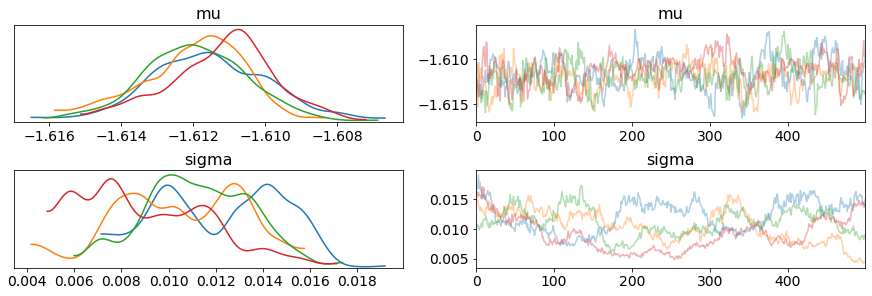

In [4]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])
###########################################################################################